##                                  ***Hotel Bookings Analysis***

## Workflow :

* Understanding The data
* Cleaning The Data
* Exploratory Data Analysis
* Insights

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:
df=pd.read_csv("hotel_bookings.csv")

## Viewing Data

In [3]:
df.head().iloc[:,15:]

,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Column Discription

- Hotel (H1 = Resort Hotel or H2 = City Hotel)
- is_canceled = Value indicating if the booking was canceled (1) or not (0)
- lead_time = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year = Year of arrival date
- arrival_date_month = Month of arrival date
- arrival_date_week_number = Week number of year for arrival date
- arrival_date_day_of_month = Day of arrival date
- stays_in_weekend_nights = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hote
- stays_in_week_nights = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults = Number of adults
- children = Number of children
- babies = Number of babies
- meal = Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
- country = Country of origin. Categories are represented in the ISO 3155–3:2013 formal
- market_segment = Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution_channel = Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest = Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations = Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled = Number of previous bookings not cancelled by the customer prior to the current booking
- reserved_room_type = Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- assigned_room_type = Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due
- booking_changes = Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
- deposit_type = Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories
- agent = ID of the travel agency that made the booking
- company = ID of the company/entity that made the booking or responsible for paying the booking.
- days_in_waiting_list = Number of days the booking was in the waiting list before it was confirmed to the custome
- customer_type = Type of booking, assuming one of four categories
- adr = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces = Number of car parking spaces required by the customer
- total_of_special_requests = Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status = Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out
- reservation_status_date = Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus 

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
85765,City Hotel,0,0,2016,March,13,20,1,0,2,...,No Deposit,NaN,NaN,0,Transient,139.00,0,0,Check-Out,2016-03-21
56409,City Hotel,1,4,2016,September,37,5,1,1,2,...,No Deposit,9.0,NaN,0,Transient,149.00,0,0,Canceled,2016-09-02
111566,City Hotel,0,10,2017,May,19,10,0,3,2,...,No Deposit,NaN,NaN,0,Transient,141.00,0,0,Check-Out,2017-05-13
104146,City Hotel,0,62,2017,January,1,2,1,3,2,...,No Deposit,9.0,NaN,0,Transient,88.40,0,3,Check-Out,2017-01-06
60842,City Hotel,1,503,2016,November,48,24,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2015-10-21
58567,City Hotel,1,37,2016,October,42,13,0,3,2,...,No Deposit,56.0,NaN,0,Transient-Party,105.00,0,0,Canceled,2016-09-06
21212,Resort Hotel,0,0,2016,February,8,20,0,1,2,...,No Deposit,240.0,NaN,0,Transient,48.00,0,0,Check-Out,2016-02-21
52585,City Hotel,1,56,2016,June,24,8,0,1,2,...,No Deposit,191.0,NaN,0,Transient-Party,120.00,0,0,Canceled,2016-06-02
94185,City Hotel,0,301,2016,July,31,30,1,1,1,...,No Deposit,6.0,NaN,0,Transient-Party,90.00,0,0,Check-Out,2016-08-01
17179,Resort Hotel,0,193,2015,September,38,15,4,10,1,...,No Deposit,2.0,NaN,0,Contract,53.55,0,0,Check-Out,2015-09-29


## Checking the shape of data

In [7]:
df.shape


(119390, 32)

## Basic Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Checking the missing value

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Checking The Null Value Percentage

In [10]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------------",df[i].isnull().sum()/df.shape[0]*100,"%")

children --------------- 0.003350364352123293 %
country --------------- 0.40874445095904177 %
agent --------------- 13.686238378423655 %
company --------------- 94.30689337465449 %


## Droping Company Column Because It Has 94% Null Values

In [11]:
df.drop(columns=["company"],inplace=True)

# Imputation

## Checking Data Type

In [12]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Droping The Rows Which Have Null Values In Country

In [13]:
df.dropna(how="any",axis=0,inplace=True)

## Filling The Null Values

In [14]:
for i in df.columns:
    if df[i].isnull().any():
        if df[i].dtypes=="object":
            df[i].fillna(df[i].mode()[0],inplace=True)
        elif  df[i].dtypes=="float":
            df[i].fillna(df[i].median(),inplace=True)
        elif  df[i].dtypes=="int":
            df[i].fillna(df[i].median(),inplace=True)
        else:
            pass

In [15]:
df.isnull().sum().sum()

0

## Statistical Summary Of The Data

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,102894.0,0.390314,0.487823,0.00,0.0,0.0,1.0,1.0
lead_time,102894.0,111.740092,107.681013,0.00,26.0,79.0,169.0,629.0
arrival_date_year,102894.0,2016.156977,0.706117,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,102894.0,27.339155,13.279990,1.00,17.0,28.0,38.0,53.0
arrival_date_day_of_month,102894.0,15.786771,8.794042,1.00,8.0,16.0,24.0,31.0
stays_in_weekend_nights,102894.0,0.978181,1.003991,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,102894.0,2.589655,1.905941,0.00,1.0,2.0,3.0,41.0
adults,102894.0,1.899926,0.490891,0.00,2.0,2.0,2.0,26.0
children,102894.0,0.111231,0.411982,0.00,0.0,0.0,0.0,10.0
babies,102894.0,0.007697,0.097089,0.00,0.0,0.0,0.0,10.0


## Correlation Between Columns

In [17]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.277666,0.004561,0.004172,-0.005468,-0.023589,0.003918,0.037057,0.005409,-0.032038,-0.029913,0.117983,-0.042589,-0.131714,-0.081939,0.052475,0.023284,-0.188298,-0.257934
lead_time,0.277666,1.000000,0.041082,0.120155,-0.003472,0.047674,0.124195,0.072477,-0.049796,-0.021975,-0.055432,0.100271,-0.045082,-0.000282,-0.068753,0.170352,-0.112652,-0.111226,-0.123047
arrival_date_year,0.004561,0.041082,1.000000,-0.530387,0.005206,0.020693,0.032807,0.061359,0.065394,-0.009828,-0.022428,-0.134031,0.015334,0.036468,0.063684,-0.061742,0.222059,-0.012864,0.121490
arrival_date_week_number,0.004172,0.120155,-0.530387,1.000000,0.057587,0.010114,0.013212,0.003496,-0.000687,0.007865,-0.013250,0.042645,-0.025095,0.008551,-0.030993,0.023822,0.062570,-0.001477,0.021639
arrival_date_day_of_month,-0.005468,-0.003472,0.005206,0.057587,1.000000,-0.016510,-0.030852,0.001151,0.013545,-0.002426,-0.008447,-0.024869,0.001447,0.011505,0.001731,0.024778,0.025590,0.004745,0.002560
stays_in_weekend_nights,-0.023589,0.047674,0.020693,0.010114,-0.016510,1.000000,0.486350,0.070997,0.039961,0.020068,-0.056987,-0.003021,-0.028041,0.054693,0.141387,-0.064610,0.016233,-0.011037,0.056110
stays_in_week_nights,0.003918,0.124195,0.032807,0.013212,-0.030852,0.486350,1.000000,0.071890,0.039922,0.021008,-0.057415,-0.013591,-0.029082,0.081598,0.183281,-0.009330,0.036263,-0.016376,0.050318
adults,0.037057,0.072477,0.061359,0.003496,0.001151,0.070997,0.071890,1.000000,0.014385,0.013307,-0.073802,-0.003366,-0.054299,-0.051995,-0.034489,-0.022945,0.237099,0.036907,0.116793
children,0.005409,-0.049796,0.065394,-0.000687,0.013545,0.039961,0.039922,0.014385,1.000000,0.016742,-0.018975,-0.025070,-0.009899,0.055324,0.041242,-0.036455,0.335729,0.065531,0.068130
babies,-0.032038,-0.021975,-0.009828,0.007865,-0.002426,0.020068,0.021008,0.013307,0.016742,1.000000,-0.006906,-0.007150,-0.002595,0.094213,0.036338,-0.010894,0.025584,0.039087,0.091729


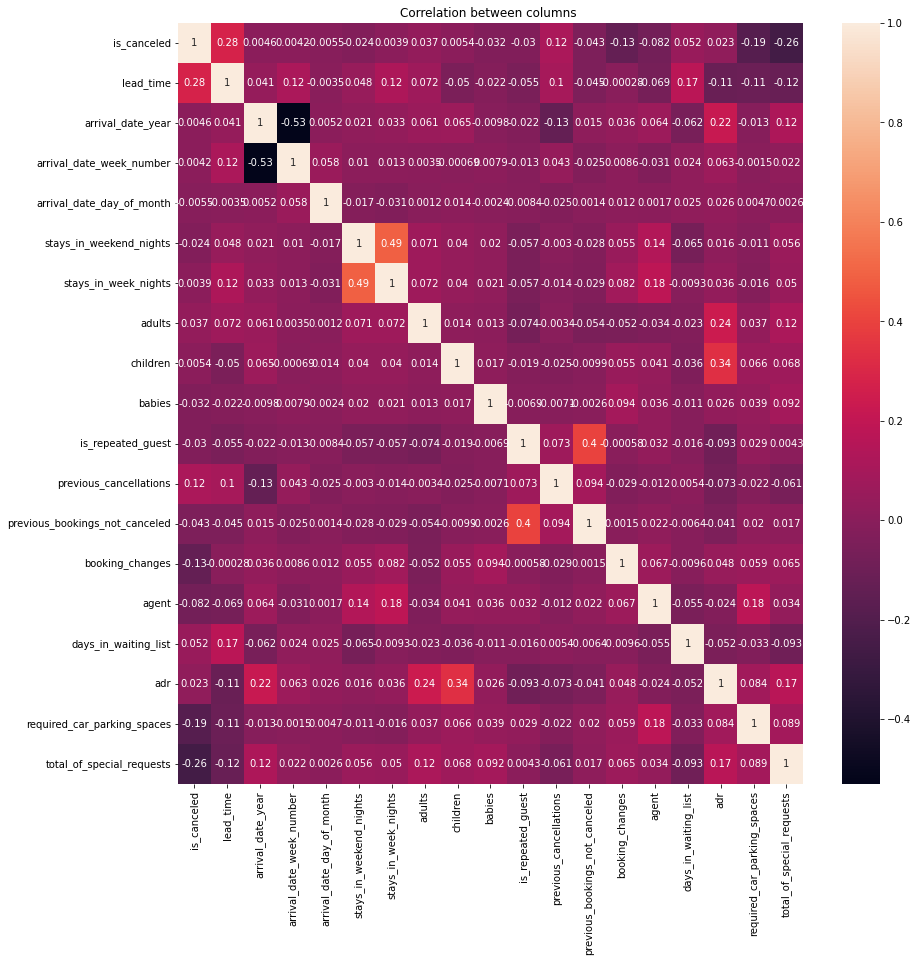

In [18]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between columns ")
plt.show()

# **Exploratory Data Analysis**

## Univariate Analysis

We will start by visualizing the cancellation rate, which is the proportion of bookings that were ultimately cancelled.

## ***Hotel Column***

### Booking Of Hotels On The Basis Of There Categories

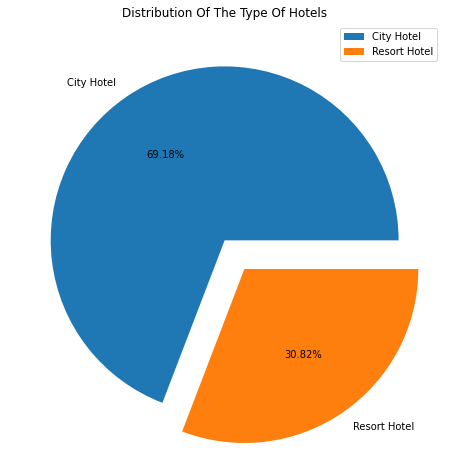

In [56]:
plt.figure(figsize=(12,8))
plt.pie(df.hotel.value_counts().values,explode=[0,0.2],labels=df.hotel.value_counts().index,autopct='%.2f%%')
plt.legend()
plt.title('Distribution Of The Type Of Hotels')
plt.show()

We can observe from this graph that the hotels located within the city have a higher number of bookings compared to the resort hotels.

### Peak Arrival Dates 

In [20]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

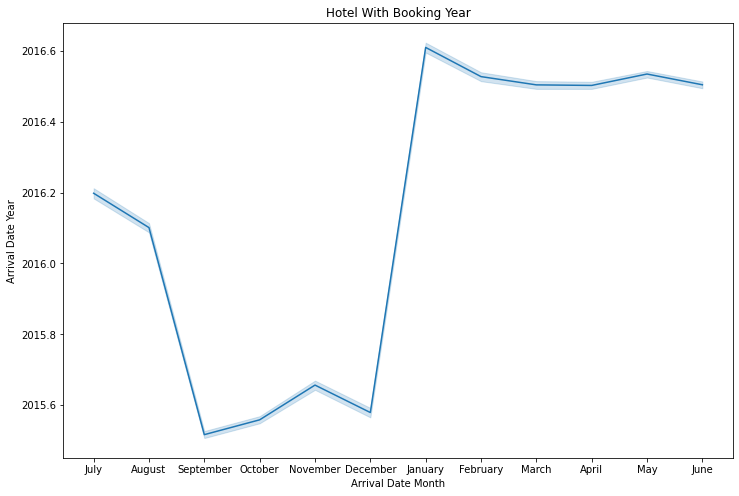

In [55]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x='arrival_date_month',y='arrival_date_year')
plt.xlabel('Arrival Date Month')
plt.ylabel('Arrival Date Year')
plt.title('Hotel With Booking Year')
plt.show()

- The peak period for hotel bookings typically occurs from January and extends through February to June.

## ***Cancelled Booking***

### How Many Booking Got Cancelled

In [27]:
df["is_canceled"].unique()

array([0, 1])

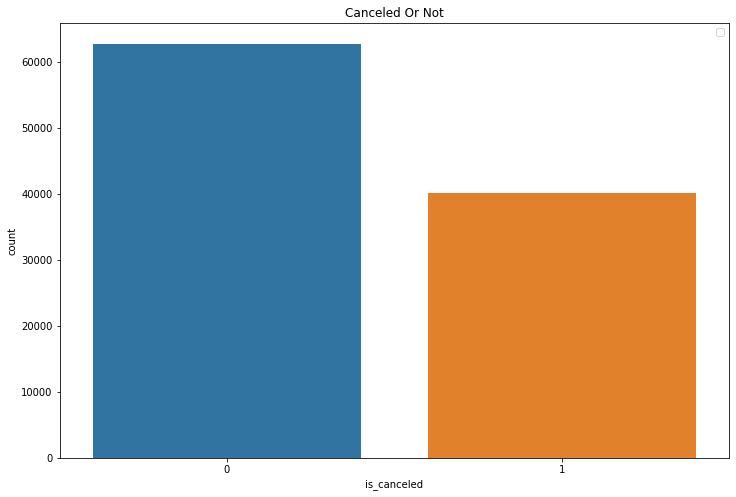

In [54]:
plt.figure(figsize=(12,8))
plt.legend()
sns.countplot(df["is_canceled"])
plt.title("Canceled Or Not")
plt.show()

### Pie Chart To Show The Distribution

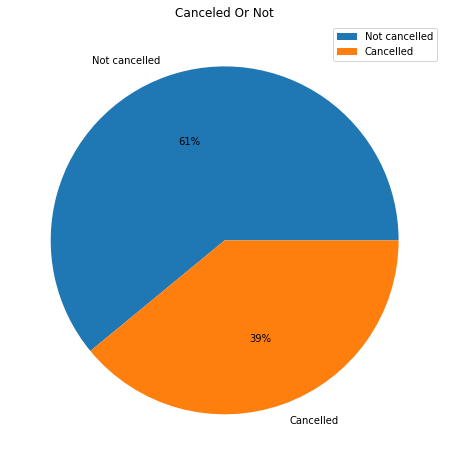

In [53]:
plt.figure(figsize=(12,8))
l1=["Not cancelled","Cancelled"]
l=list(df["is_canceled"].value_counts())
l
plt.pie(l,labels=l1,autopct="%0.0f%%");
plt.legend()
plt.title("Canceled Or Not")
plt.show()

- Almost 40% of the bookings get cancelled.

## ***Deposit Type***

### Which Type Of Deposit Is Preferred

In [43]:
df["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

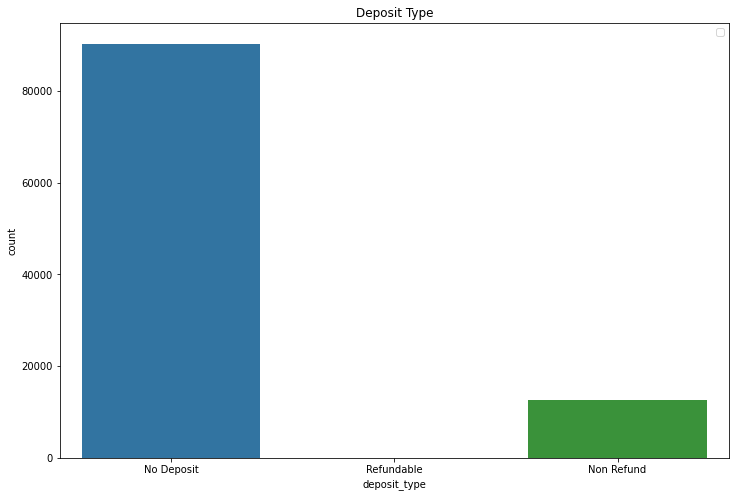

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(df["deposit_type"])
plt.legend()
plt.title("Deposit Type")
plt.show()

- According to the data, most people preferred booking without a deposit.

## ***Customer Type***

Popular types of hotel distribution channels:

1. Direct website bookings 
2. Direct phone bookings 
3. Online travel agencies (OTAs) 
4. Global distribution systems 
5. Metasearch sites 

### What Types Of Customers Are There

In [49]:
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

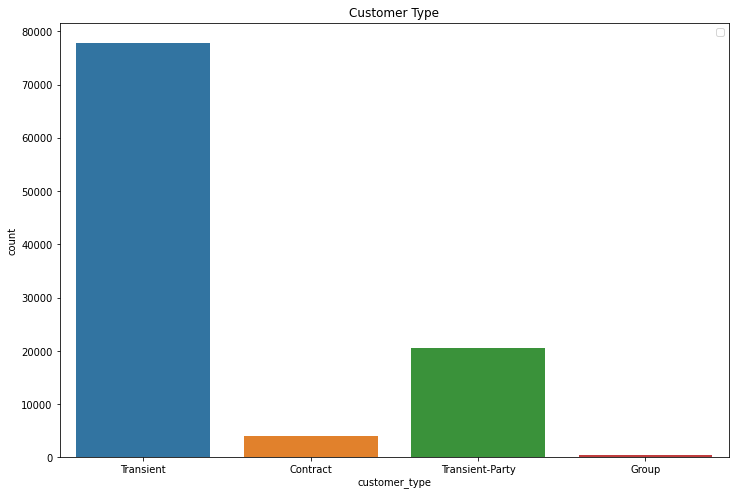

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(df["customer_type"])
plt.legend()
plt.title("Customer Type")
plt.show()

## ***Distribution***

In [57]:
(df["distribution_channel"])

3         Corporate
4             TA/TO
5             TA/TO
7            Direct
8             TA/TO
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel, Length: 102894, dtype: object

### What Distribution Has The Highest Number Of Values

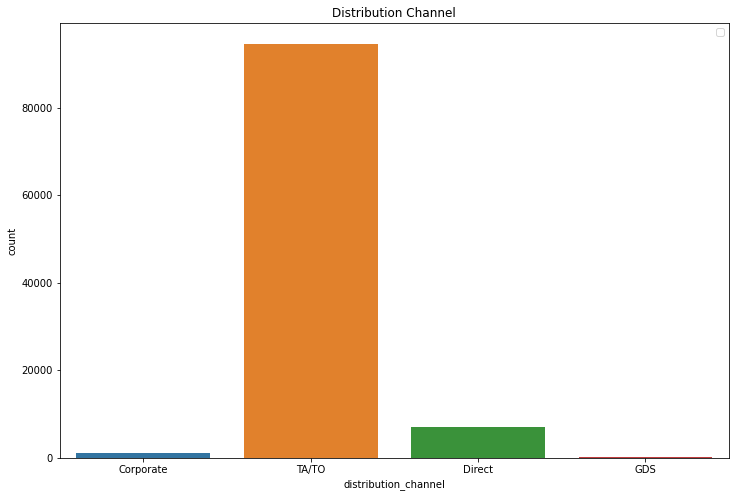

In [59]:
plt.figure(figsize=(12,8))
sns.countplot(df["distribution_channel"])
plt.legend()
plt.title("Distribution Channel")
plt.show()

- The TA/TO distribution channel is predominantly utilized.
- GDS is used less frequently.

## ***Reserved Room Types***

In [63]:
df["reserved_room_type"].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'B'], dtype=object)

### What Type Of Room Is The Most Frequently Reserved

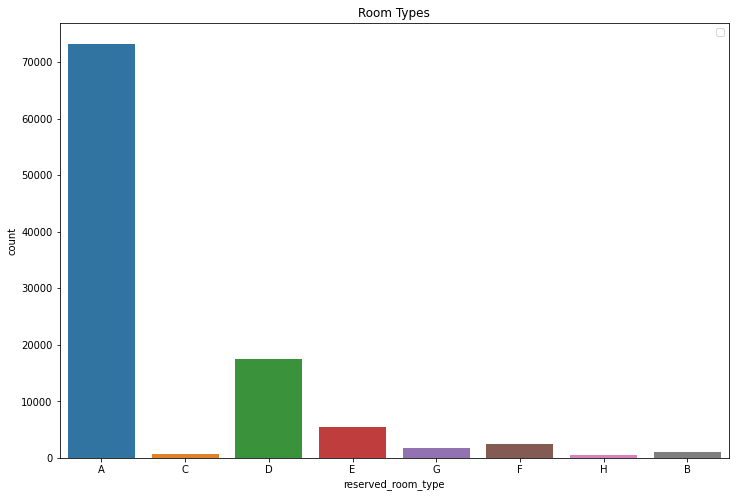

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(df["reserved_room_type"])
plt.legend()
plt.title("Room Types")
plt.show()

- We can observe that reservations are predominantly made for rooms of type A.
- The rooms of both L type and P type were not booked.

## ***Lead Time***

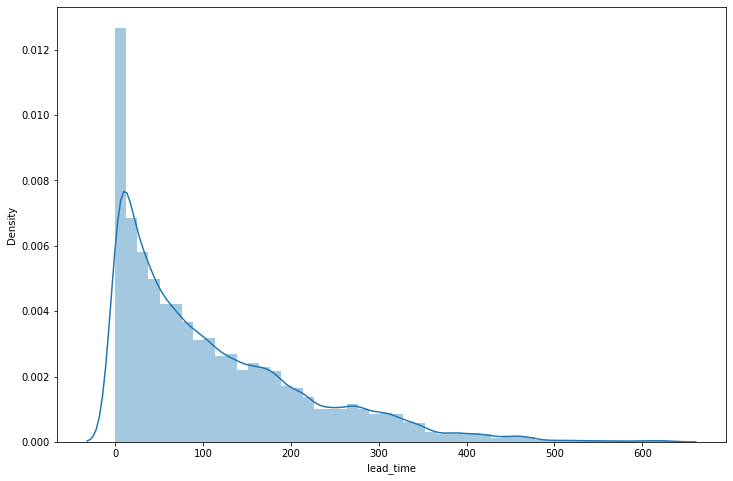

In [68]:
plt.figure(figsize=(12,8))
sns.distplot(df["lead_time"])
plt.show()

We can observe that the majority of the significant time intervals fall within the range of 0-200.

# **Bivariate Analysis**

## ***Total Bookings By Year***

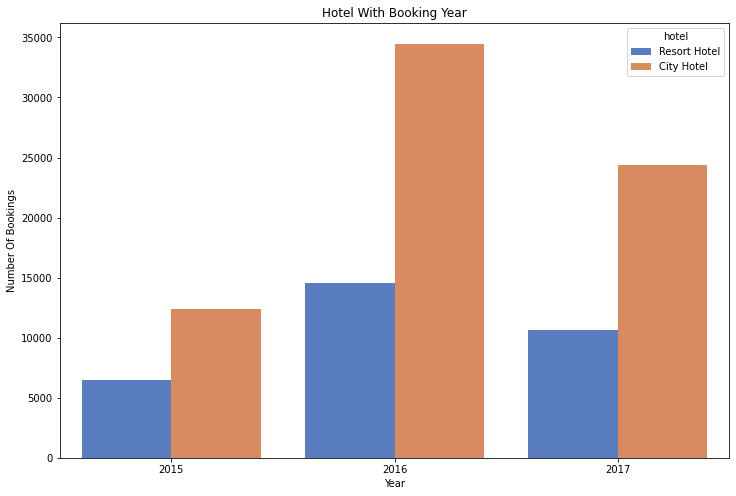

In [73]:
plt.figure(figsize=(12,8))
sns.countplot(x='arrival_date_year',data=df,hue='hotel',palette="muted")
plt.xlabel('Year')
plt.ylabel('Number Of Bookings')
plt.title('Hotel With Booking Year')
plt.show()

## ***Room Cancelled After Booking***

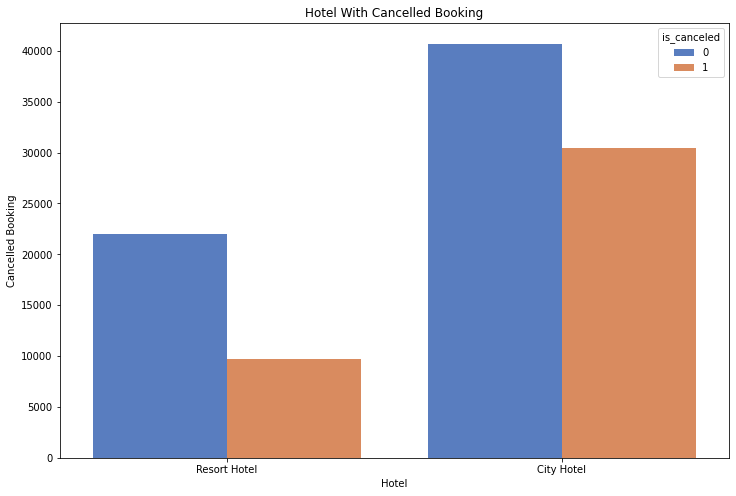

In [79]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='hotel',hue='is_canceled',palette="muted")
plt.xlabel('Hotel')
plt.ylabel('Cancelled Booking')
plt.title("Hotel With Cancelled Booking")
plt.show()

## ***Booking Cancelled With Respect To Special Requests***

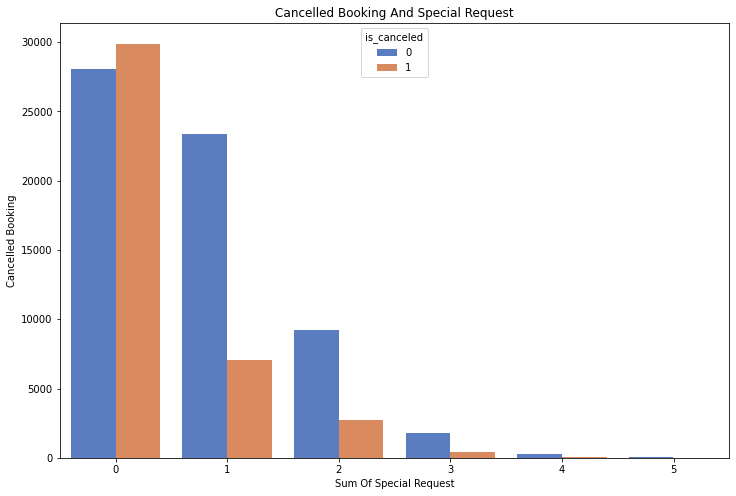

In [80]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='total_of_special_requests',hue='is_canceled',palette="muted")
plt.xlabel('Sum Of Special Request')
plt.ylabel('Cancelled Booking')
plt.title('Cancelled Booking And Special Request')
plt.show()

## ***Booking Cancelled With Respect To Deposit Type***

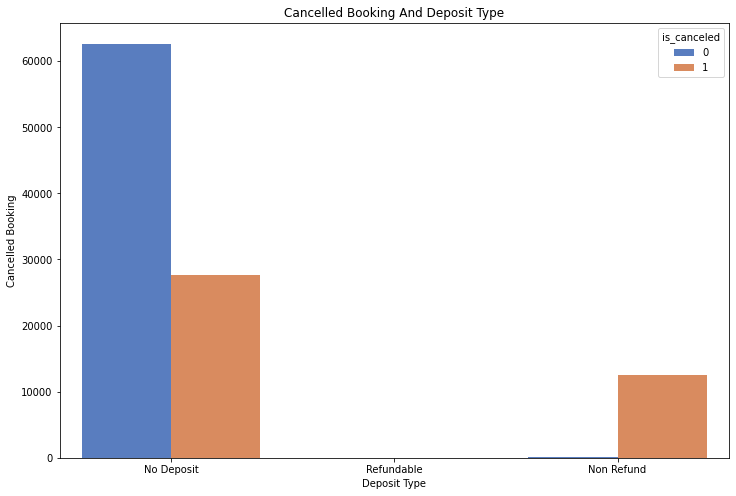

In [82]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled',palette= 'muted')
plt.xlabel('Deposit Type')
plt.ylabel('Cancelled Booking')
plt.title('Cancelled Booking And Deposit Type')
plt.show()

In [ ]:
df["meal"].unique()

## ***Type Of Meal provided In Hotel***

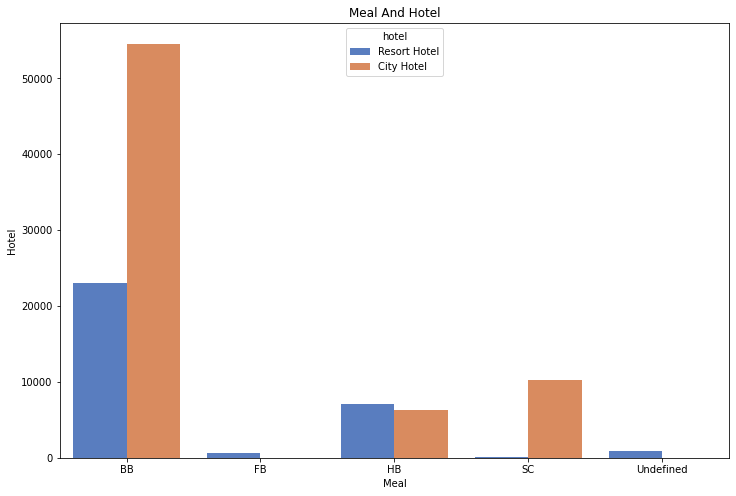

In [85]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'meal', data = df, hue = 'hotel',palette= 'muted')
plt.xlabel('Meal')
plt.ylabel("Hotel")
plt.title('Meal And Hotel')
plt.show()

## ***Market Segment With Highest Cancelled Booking***

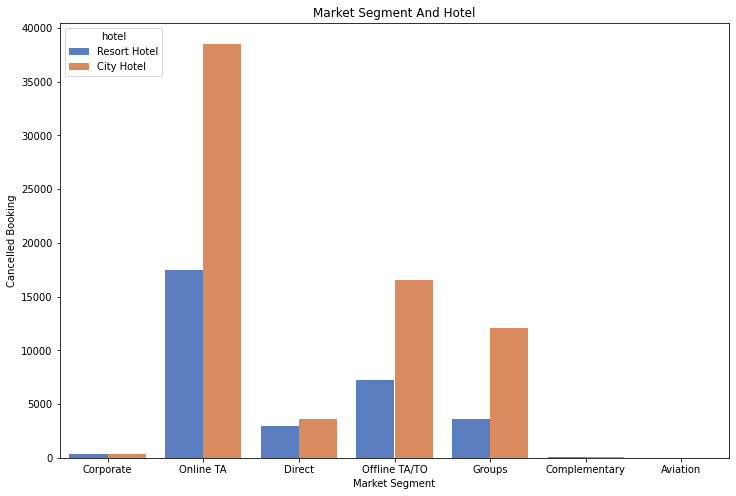

In [87]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'market_segment', data = df, hue = 'hotel',palette= 'muted')
plt.xlabel('Market Segment')
plt.ylabel('Cancelled Booking')
plt.title('Market Segment And Hotel')
plt.show()

## ***Hotel Booking By Distribution Channel***

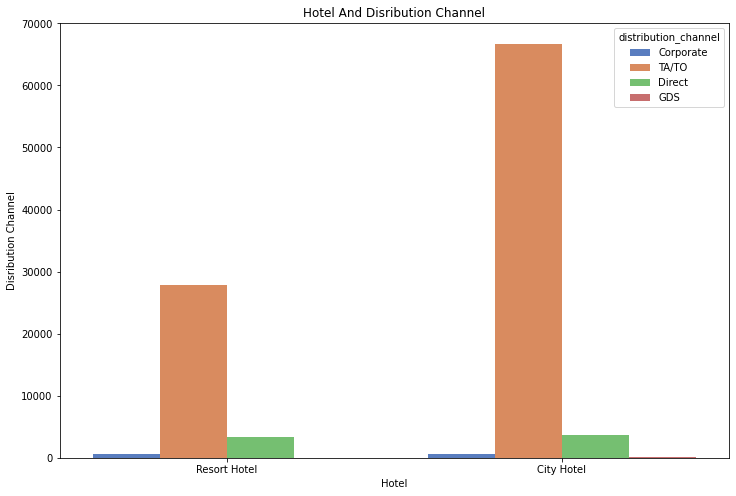

In [89]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='hotel',hue='distribution_channel',palette="muted")
plt.xlabel('Hotel')
plt.ylabel('Disribution Channel')
plt.title('Hotel And Disribution Channel')
plt.show()

## ***Type Of Room Booked Coresponding With Hotel Type***


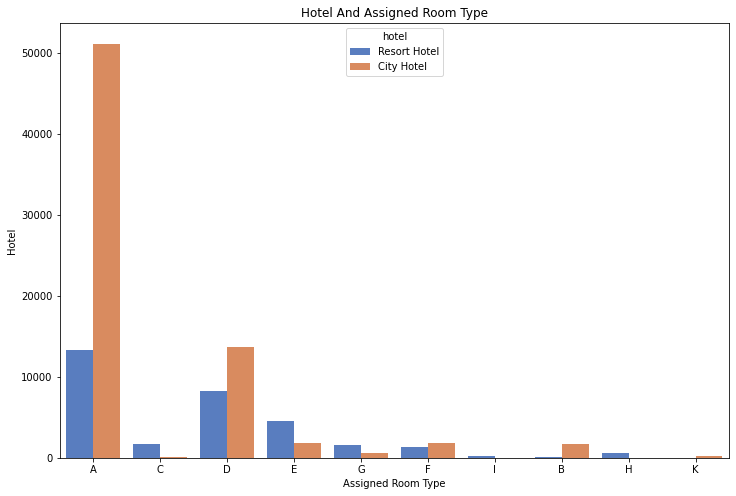

In [92]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='assigned_room_type',hue='hotel',palette="muted")
plt.xlabel('Assigned Room Type')
plt.ylabel('Hotel')
plt.title('Hotel And Assigned Room Type')
plt.show()

___
---